## Analysis of CIFER-10 and MNIST Dataset using CNN

In [1]:
# Importing the Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the MNIST and CIFAR-10 dataset
mnist = tf.keras.datasets.mnist
(m_x_train,m_y_train),(m_x_test,m_y_test) = mnist.load_data()

cifar10 = tf.keras.datasets.cifar10
(c_x_train,c_y_train),(c_x_test,c_y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [3]:
print("MNIST Training data shape: "); print(m_x_train.shape);
print("MNIST Testing data shape: ");  print(m_x_test.shape);

MNIST Training data shape: 
(60000, 28, 28)
MNIST Testing data shape: 
(10000, 28, 28)


In [4]:
print("CIFAR_10 Training data shape: "); print(c_x_train.shape);
print("CIFAR_10 Testing data shape: ");  print(c_x_test.shape);

CIFAR_10 Training data shape: 
(50000, 32, 32, 3)
CIFAR_10 Testing data shape: 
(10000, 32, 32, 3)


In [5]:
classes,idx = np.unique(c_y_train,return_index=True)
print("Number of Classes in CIFAR-10: ",len(classes))

Number of Classes in CIFAR-10:  10


One Image for each class in CIFER-10 Dataset

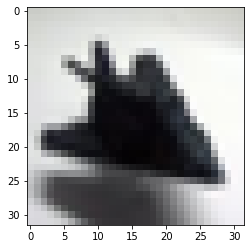

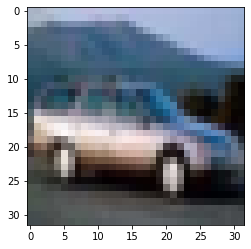

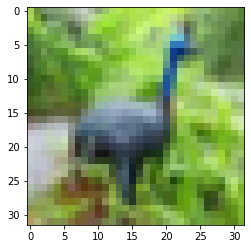

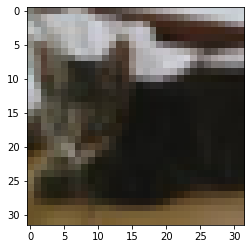

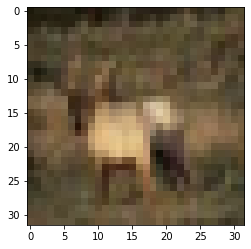

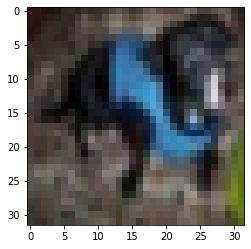

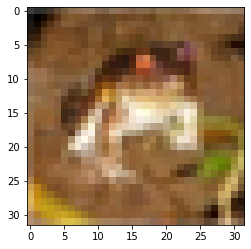

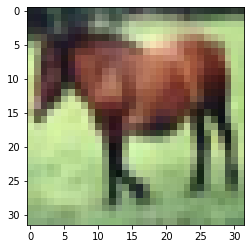

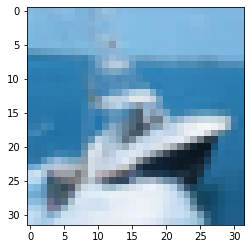

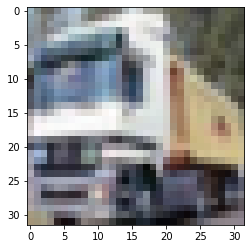

In [6]:
for i in idx:
  plt.imshow(c_x_train[i])
  plt.show()

In [7]:
classes,freq = np.unique(c_y_train, return_counts=True)
freq

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])

Every Class in CIFAR-10 training dataset has 5000 images

Normalizing both the datasets

In [8]:
c_x_train = c_x_train/255.0
c_x_test = c_x_test/255.0

In [9]:
m_x_train = m_x_train/255.0
m_x_test = m_x_test/255.0

1.  First CNN model

In [26]:
# CNN model for CIFAR-10 Dataset
model1 = tf.keras.Sequential()

model1.add(tf.keras.Input(shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5), activation="relu", padding="valid", name="ConvLayer"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="PoolLayer"))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer"))
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model1.compile(loss="sparse_categorical_crossentropy" , optimizer="Adam", metrics=["accuracy"])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 PoolLayer (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
_________________________________________________________________


In [27]:
hist_Cifar_1 = model1.fit(c_x_train,c_y_train,batch_size=35,epochs=30,validation_split=0.15)

Epoch 1/30
1215/1215 [==============================] - 5s 4ms/step - loss: 1.8257 - accuracy: 0.4013 - val_loss: 1.6374 - val_accuracy: 0.4712
Epoch 2/30
1215/1215 [==============================] - 5s 4ms/step - loss: 1.6249 - accuracy: 0.4671 - val_loss: 1.6623 - val_accuracy: 0.4525
Epoch 3/30
1215/1215 [==============================] - 5s 4ms/step - loss: 1.5834 - accuracy: 0.4844 - val_loss: 1.6582 - val_accuracy: 0.4360
Epoch 4/30
1215/1215 [==============================] - 4s 4ms/step - loss: 1.5512 - accuracy: 0.5001 - val_loss: 1.6925 - val_accuracy: 0.4608
Epoch 5/30
1215/1215 [==============================] - 4s 4ms/step - loss: 1.5249 - accuracy: 0.5138 - val_loss: 1.5192 - val_accuracy: 0.5247
Epoch 6/30
1215/1215 [==============================] - 5s 4ms/step - loss: 1.4968 - accuracy: 0.5290 - val_loss: 1.4729 - val_accuracy: 0.5485
Epoch 7/30
1215/1215 [==============================] - 4s 4ms/step - loss: 1.4662 - accuracy: 0.5405 - val_loss: 1.4467 - val_accuracy:

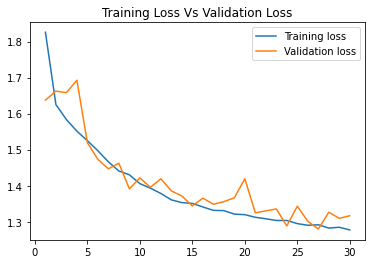

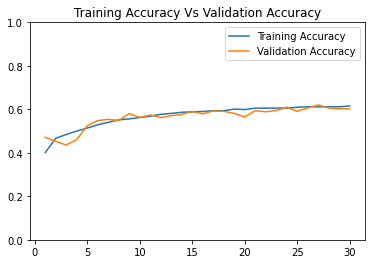

In [28]:
# Plotting loss and accuracy for training vs validation 
acc1 = hist_Cifar_1.history['accuracy']
val_acc1 = hist_Cifar_1.history['val_accuracy']
loss1 = hist_Cifar_1.history['loss']
val_loss1 = hist_Cifar_1.history['val_loss']

epochs = range(1, len(loss1)+1)
plt.plot(epochs, loss1, label='Training loss')
plt.plot(epochs, val_loss1, label='Validation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc1, label="Training Accuracy")
plt.plot(epochs, val_acc1, label="Validation Accuracy")
plt.title("Training Accuracy Vs Validation Accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [29]:
model1.evaluate(c_x_test, c_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3098 - accuracy: 0.6033


[1.3098158836364746, 0.6032999753952026]

In [30]:
# CNN Model for MNIST Dataset
model1_MNIST = tf.keras.Sequential()

model1_MNIST.add(tf.keras.Input(shape=(28,28,1)))
model1_MNIST.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5), activation="relu", padding="valid", name="ConvLayer"))
model1_MNIST.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="PoolLayer"))
model1_MNIST.add(tf.keras.layers.Flatten())
model1_MNIST.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer"))
model1_MNIST.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))

opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model1_MNIST.compile(loss="sparse_categorical_crossentropy" , optimizer=opt, metrics=["accuracy"])

model1_MNIST.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 PoolLayer (MaxPooling2D)    (None, 12, 12, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
_________________________________________________________________


In [31]:
hist_Mnist_1 = model1_MNIST.fit(m_x_train,m_y_train,batch_size=32,epochs=20,validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.1282 - accuracy: 0.9610 - val_loss: 0.0566 - val_accuracy: 0.9838
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0466 - val_accuracy: 0.9844
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0540 - val_accuracy: 0.9852
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0212 - accuracy: 0.9927 - val_loss: 0.0514 - val_accuracy: 0.9871
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0540 - val_accuracy: 0.9878
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0868 - val_accuracy: 0.9840
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0646 - val_accuracy:

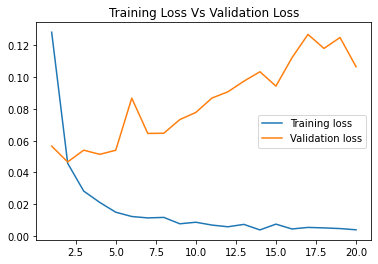

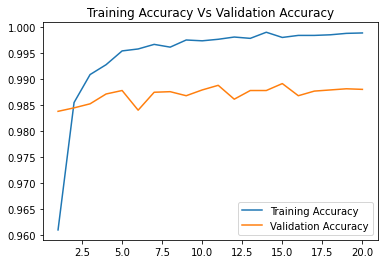

In [33]:
# Plotting loss and accuracy for training vs validation 
acc1 = hist_Mnist_1.history['accuracy']
val_acc1 = hist_Mnist_1.history['val_accuracy']
loss1 = hist_Mnist_1.history['loss']
val_loss1 = hist_Mnist_1.history['val_loss']

epochs = range(1, len(loss1)+1)
plt.plot(epochs, loss1, label='Training loss')
plt.plot(epochs, val_loss1, label='Validation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc1, label="Training Accuracy")
plt.plot(epochs, val_acc1, label="Validation Accuracy")
plt.title("Training Accuracy Vs Validation Accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [34]:
model1_MNIST.evaluate(m_x_test, m_y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9873


[0.08466982841491699, 0.9872999787330627]

2. Second CNN Model

In [57]:
# A CNN Model for CIFAR-10 Dataset
model2_CIFAR = tf.keras.Sequential()

model2_CIFAR.add(tf.keras.Input(shape=(32,32,3)))
model2_CIFAR.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding="valid", name="ConvLayer1"))
model2_CIFAR.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding="valid", name="ConvLayer2"))
model2_CIFAR.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="PoolLayer"))
model2_CIFAR.add(tf.keras.layers.Flatten())
model2_CIFAR.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer"))
model2_CIFAR.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model2_CIFAR.compile(loss="sparse_categorical_crossentropy" , optimizer="Adam", metrics=["accuracy"])

model2_CIFAR.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer1 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 ConvLayer2 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 PoolLayer (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 638,454
Trainable params: 638,454
Non-t

In [59]:
hist_Cifar_2 = model2_CIFAR.fit(c_x_train,c_y_train,batch_size=35,epochs=40,validation_split=0.12)

Epoch 1/40
1258/1258 [==============================] - 5s 4ms/step - loss: 1.5418 - accuracy: 0.5214 - val_loss: 1.5057 - val_accuracy: 0.5444
Epoch 2/40
1258/1258 [==============================] - 5s 4ms/step - loss: 1.4636 - accuracy: 0.5562 - val_loss: 1.5163 - val_accuracy: 0.5582
Epoch 3/40
1258/1258 [==============================] - 5s 4ms/step - loss: 1.4054 - accuracy: 0.5792 - val_loss: 1.4139 - val_accuracy: 0.5774
Epoch 4/40
1258/1258 [==============================] - 5s 4ms/step - loss: 1.3641 - accuracy: 0.5991 - val_loss: 1.3292 - val_accuracy: 0.6020
Epoch 5/40
1258/1258 [==============================] - 5s 4ms/step - loss: 1.3371 - accuracy: 0.6079 - val_loss: 1.2964 - val_accuracy: 0.6212
Epoch 6/40
1258/1258 [==============================] - 5s 4ms/step - loss: 1.3040 - accuracy: 0.6161 - val_loss: 1.2821 - val_accuracy: 0.6300
Epoch 7/40
1258/1258 [==============================] - 5s 4ms/step - loss: 1.2786 - accuracy: 0.6282 - val_loss: 1.2670 - val_accuracy:

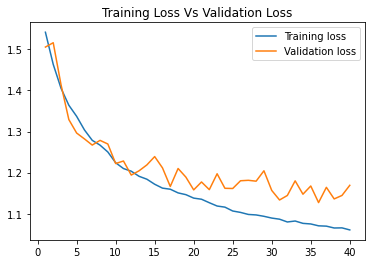

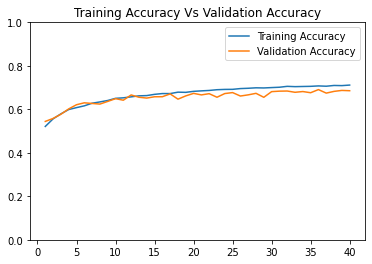

In [60]:
# Plotting loss and accuracy for training vs validation 
acc1 = hist_Cifar_2.history['accuracy']
val_acc1 = hist_Cifar_2.history['val_accuracy']
loss1 = hist_Cifar_2.history['loss']
val_loss1 = hist_Cifar_2.history['val_loss']

epochs = range(1, len(loss1)+1)
plt.plot(epochs, loss1, label='Training loss');
plt.plot(epochs, val_loss1, label='Validation loss');
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc1, label="Training Accuracy");
plt.plot(epochs, val_acc1, label="Validation Accuracy");
plt.title("Training Accuracy Vs Validation Accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [61]:
model2_CIFAR.evaluate(c_x_test,c_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1840 - accuracy: 0.6761


[1.1839646100997925, 0.6761000156402588]

In [35]:
# A CNN Model for MNIST Dataset
model2_MNIST = tf.keras.Sequential()

model2_MNIST.add(tf.keras.Input(shape=(28,28,1)))
model2_MNIST.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding="valid", name="ConvLayer1"))
model2_MNIST.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation="relu", padding="valid", name="ConvLayer2"))
model2_MNIST.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="PoolLayer"))
model2_MNIST.add(tf.keras.layers.Flatten())
model2_MNIST.add(tf.keras.layers.Dense(100, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer"))
model2_MNIST.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model2_MNIST.compile(loss="sparse_categorical_crossentropy" , optimizer="Adam", metrics=["accuracy"])

model2_MNIST.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer1 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 ConvLayer2 (Conv2D)         (None, 24, 24, 32)        9248      
                                                                 
 PoolLayer (MaxPooling2D)    (None, 12, 12, 32)        0         
                                                                 
 flatten_7 (Flatten)         (None, 4608)              0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 471,478
Trainable params: 471,478
Non-tr

In [37]:
hist_Mnist_2 = model2_MNIST.fit(m_x_train,m_y_train,batch_size=32,epochs=20,validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1615 - accuracy: 0.9753 - val_loss: 0.1425 - val_accuracy: 0.9800
Epoch 2/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1545 - accuracy: 0.9762 - val_loss: 0.1474 - val_accuracy: 0.9798
Epoch 3/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1439 - accuracy: 0.9781 - val_loss: 0.1371 - val_accuracy: 0.9807
Epoch 4/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1374 - accuracy: 0.9786 - val_loss: 0.1235 - val_accuracy: 0.9840
Epoch 5/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1343 - accuracy: 0.9791 - val_loss: 0.1190 - val_accuracy: 0.9843
Epoch 6/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1277 - accuracy: 0.9804 - val_loss: 0.1310 - val_accuracy: 0.9802
Epoch 7/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1292 - accuracy: 0.9796 - val_loss: 0.1303 - val_accuracy:

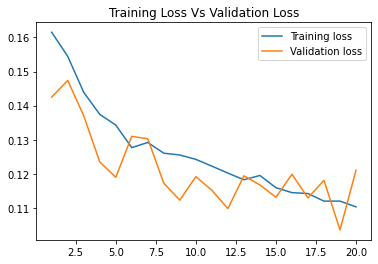

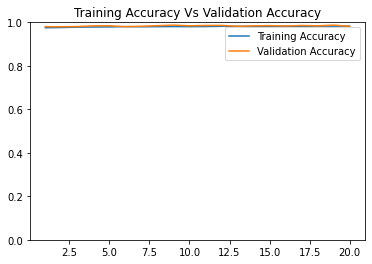

In [38]:
# Plotting loss and accuracy for training vs validation 
acc1 = hist_Mnist_2.history['accuracy']
val_acc1 = hist_Mnist_2.history['val_accuracy']
loss1 = hist_Mnist_2.history['loss']
val_loss1 = hist_Mnist_2.history['val_loss']

epochs = range(1, len(loss1)+1)
plt.plot(epochs, loss1, label='Training loss');
plt.plot(epochs, val_loss1, label='Validation loss');
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc1, label="Training Accuracy");
plt.plot(epochs, val_acc1, label="Validation Accuracy");
plt.title("Training Accuracy Vs Validation Accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [39]:
model2_MNIST.evaluate(m_x_test,m_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1180 - accuracy: 0.9809


[0.11796648800373077, 0.98089998960495]

3. Third CNN Model

In [69]:
# A CNN Model for CIFAR-10 Dataset
model3_CIFAR = tf.keras.Sequential()

model3_CIFAR.add(tf.keras.Input(shape=(32,32,3)))
model3_CIFAR.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5), activation="tanh", padding="same", name="ConvLayer1"))
model3_CIFAR.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="PoolLayer1"))
model3_CIFAR.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5), activation="tanh", padding="valid", name="ConvLayer2"))
model3_CIFAR.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="PoolLayer2"))
model3_CIFAR.add(tf.keras.layers.Flatten())
model3_CIFAR.add(tf.keras.layers.Dense(120, activation="sigmoid",kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer1"))
model3_CIFAR.add(tf.keras.layers.Dense(84, activation="sigmoid",kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer2"))
model3_CIFAR.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model3_CIFAR.compile(loss="sparse_categorical_crossentropy" , optimizer="Adam", metrics=["accuracy"])

model3_CIFAR.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer1 (Conv2D)         (None, 32, 32, 6)         456       
                                                                 
 PoolLayer1 (MaxPooling2D)   (None, 16, 16, 6)         0         
                                                                 
 ConvLayer2 (Conv2D)         (None, 12, 12, 16)        2416      
                                                                 
 PoolLayer2 (MaxPooling2D)   (None, 6, 6, 16)          0         
                                                                 
 flatten_14 (Flatten)        (None, 576)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)               69240     
                                                                 
 HiddenLayer2 (Dense)        (None, 84)              

In [70]:
hist_Cifar_3 = model3_CIFAR.fit(c_x_train,c_y_train,batch_size=35,epochs=40,validation_split=0.1)

Epoch 1/40
1286/1286 [==============================] - 6s 4ms/step - loss: 2.1796 - accuracy: 0.2466 - val_loss: 1.9596 - val_accuracy: 0.3218
Epoch 2/40
1286/1286 [==============================] - 5s 4ms/step - loss: 1.9295 - accuracy: 0.3109 - val_loss: 1.8846 - val_accuracy: 0.3228
Epoch 3/40
1286/1286 [==============================] - 5s 4ms/step - loss: 1.8746 - accuracy: 0.3263 - val_loss: 1.8451 - val_accuracy: 0.3422
Epoch 4/40
1286/1286 [==============================] - 5s 4ms/step - loss: 1.8417 - accuracy: 0.3430 - val_loss: 1.7924 - val_accuracy: 0.3638
Epoch 5/40
1286/1286 [==============================] - 6s 5ms/step - loss: 1.8021 - accuracy: 0.3707 - val_loss: 1.7793 - val_accuracy: 0.3956
Epoch 6/40
1286/1286 [==============================] - 5s 4ms/step - loss: 1.7632 - accuracy: 0.3894 - val_loss: 1.7282 - val_accuracy: 0.4160
Epoch 7/40
1286/1286 [==============================] - 5s 4ms/step - loss: 1.7313 - accuracy: 0.4041 - val_loss: 1.6937 - val_accuracy:

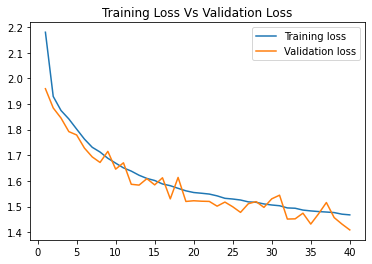

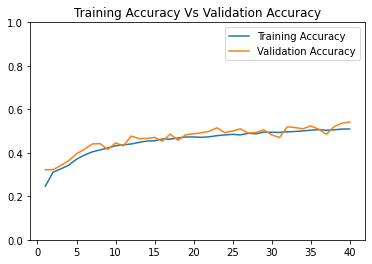

In [71]:
# Plotting loss and accuracy for training vs validation 
acc1 = hist_Cifar_3.history['accuracy']
val_acc1 = hist_Cifar_3.history['val_accuracy']
loss1 = hist_Cifar_3.history['loss']
val_loss1 = hist_Cifar_3.history['val_loss']

epochs = range(1, len(loss1)+1)
plt.plot(epochs, loss1, label='Training loss');
plt.plot(epochs, val_loss1, label='Validation loss');
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc1, label="Training Accuracy");
plt.plot(epochs, val_acc1, label="Validation Accuracy");
plt.title("Training Accuracy Vs Validation Accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [72]:
model3_CIFAR.evaluate(c_x_test,c_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4481 - accuracy: 0.5279


[1.4481440782546997, 0.527899980545044]

In [49]:
model3_MNIST = tf.keras.Sequential()

model3_MNIST.add(tf.keras.Input(shape=(28,28,1)))
model3_MNIST.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5), activation="relu", padding="same", name="ConvLayer1"))
model3_MNIST.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="PoolLayer1"))
model3_MNIST.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5), activation="relu",padding="valid", name="ConvLayer2"))
model3_MNIST.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), name="PoolLayer2"))
model3_MNIST.add(tf.keras.layers.Flatten())
model3_MNIST.add(tf.keras.layers.Dense(120, activation="sigmoid",kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer1"))
model3_MNIST.add(tf.keras.layers.Dense(84, activation="sigmoid",kernel_regularizer=tf.keras.regularizers.l2(), name="HiddenLayer2"))
model3_MNIST.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))

opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model3_MNIST.compile(loss="sparse_categorical_crossentropy" , optimizer="Adam", metrics=["accuracy"])

model3_MNIST.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLayer1 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 PoolLayer1 (MaxPooling2D)   (None, 14, 14, 6)         0         
                                                                 
 ConvLayer2 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 PoolLayer2 (MaxPooling2D)   (None, 5, 5, 16)          0         
                                                                 
 flatten_11 (Flatten)        (None, 400)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)               48120     
                                                                 
 HiddenLayer2 (Dense)        (None, 84)              

In [51]:
hist_Mnist_3 = model3_MNIST.fit(m_x_train,m_y_train,batch_size=32,epochs=20,validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.2425 - accuracy: 0.9678 - val_loss: 0.2130 - val_accuracy: 0.9765
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2308 - accuracy: 0.9700 - val_loss: 0.2123 - val_accuracy: 0.9735
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2228 - accuracy: 0.9717 - val_loss: 0.2045 - val_accuracy: 0.9782
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2177 - accuracy: 0.9718 - val_loss: 0.2014 - val_accuracy: 0.9765
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2130 - accuracy: 0.9721 - val_loss: 0.2000 - val_accuracy: 0.9758
Epoch 6/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2110 - accuracy: 0.9731 - val_loss: 0.2086 - val_accuracy: 0.9748
Epoch 7/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2081 - accuracy: 0.9733 - val_loss: 0.2132 - val_accuracy:

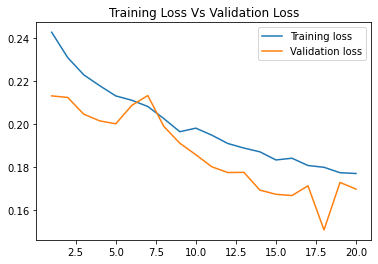

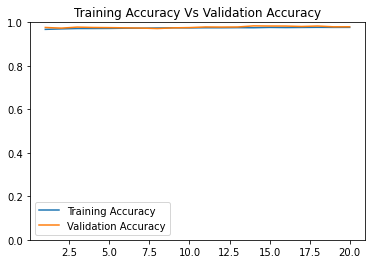

In [52]:
# Plotting loss and accuracy for training vs validation 
acc1 = hist_Mnist_3.history['accuracy']
val_acc1 = hist_Mnist_3.history['val_accuracy']
loss1 = hist_Mnist_3.history['loss']
val_loss1 = hist_Mnist_3.history['val_loss']

epochs = range(1, len(loss1)+1)
plt.plot(epochs, loss1, label='Training loss');
plt.plot(epochs, val_loss1, label='Validation loss');
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.plot(epochs, acc1, label="Training Accuracy");
plt.plot(epochs, val_acc1, label="Validation Accuracy");
plt.title("Training Accuracy Vs Validation Accuracy")
plt.ylim(0,1)
plt.legend()
plt.show()

In [53]:
model2_MNIST.evaluate(m_x_test,m_y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1180 - accuracy: 0.9809


[0.11796648800373077, 0.98089998960495]

4. Compare the performances of theabove three architectures with respect to the two datasets.

In [74]:
import pandas as pd
models = {
    'MNIST': [ 0.9873,0.9810,0.9808],
    'CIFAR-10': [0.6032,0.6761,0.5279]
}
df = pd.DataFrame(models,index=["Model-1","Model-2","Model-3"])
df.head()

,MNIST,CIFAR-10
Model-1,0.9873,0.6032
Model-2,0.9810,0.6761
Model-3,0.9808,0.5279


This is the Test Accuracy for different Models

Comparing Training vs Validation Accuracy for CIFAR-10 Models

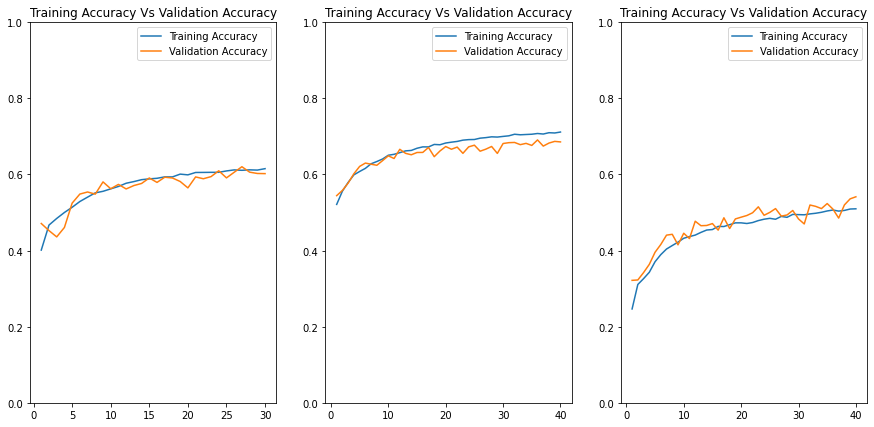

In [94]:
# Plotting loss and accuracy for training vs validation 
acc1 = hist_Cifar_1.history['accuracy']
val_acc1 = hist_Cifar_1.history['val_accuracy']
loss1 = hist_Cifar_1.history['loss']
val_loss1 = hist_Cifar_1.history['val_loss']

acc2 = hist_Cifar_2.history['accuracy']
val_acc2 = hist_Cifar_2.history['val_accuracy']
loss2 = hist_Cifar_2.history['loss']
val_loss2 = hist_Cifar_2.history['val_loss']

acc3 = hist_Cifar_3.history['accuracy']
val_acc3 = hist_Cifar_3.history['val_accuracy']
loss3 = hist_Cifar_3.history['loss']
val_loss3 = hist_Cifar_3.history['val_loss']

epochs = range(1, len(loss1)+1)
fig, ax = plt.subplots(1,3, figsize=(15,7))
ax1 = plt.subplot(1,3,1) 
ax1.plot(epochs, acc1, label="Training Accuracy");
ax1.plot(epochs, val_acc1, label="Validation Accuracy");
ax1.set_title("Training Accuracy Vs Validation Accuracy")
ax1.set_ylim(0,1)
ax1.legend()

epochs = range(1, len(loss2)+1)
ax2 = plt.subplot(1,3,2) 
ax2.plot(epochs, acc2, label="Training Accuracy");
ax2.plot(epochs, val_acc2, label="Validation Accuracy");
ax2.set_title("Training Accuracy Vs Validation Accuracy")
ax2.set_ylim(0,1)
ax2.legend()

epochs = range(1, len(loss3)+1)
ax3 = plt.subplot(1,3,3) 
ax3.plot(epochs, acc3, label="Training Accuracy");
ax3.plot(epochs, val_acc3, label="Validation Accuracy");
ax3.set_title("Training Accuracy Vs Validation Accuracy")
ax3.set_ylim(0,1)
ax3.legend()

plt.show()

<i>We can see that for Model-1 and Model-3 the Training and Validation Accuracy has less gap and they are overlapping
Whereas in Model-2 there is a gap between training and validation accuracy which indicates overfitting<br>
In terms of Predictive accuracy Model-2 is Better for CIFER-10 Datset

Overall Model-1 is Good for Both MNIST and CIFER-10 Datasets.</i>